## Random Forest Classification

In [2]:
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_olivetti_faces()

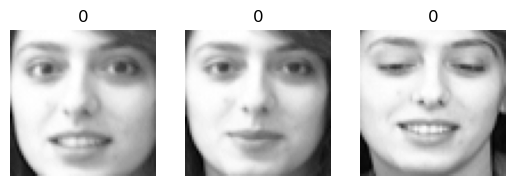

In [26]:
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(faces.images[i+70], cmap="gray")
    plt.title(faces.target[i])
    plt.axis("off")
plt.show()

In [36]:
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=150, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [37]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 91.25%


In [38]:
n_est = [10, 50, 100, 150, 200, 250, 300]
model_scores = []

for n in n_est:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores.append(accuracy)
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print(f"Best accuracy: {max(model_scores) * 100:.2f}%")
print(f"Best n_estimators: {n_est[model_scores.index(max(model_scores))]}")

Accuracy: 70.00%
Accuracy: 88.75%
Accuracy: 93.75%
Accuracy: 91.25%
Accuracy: 92.50%
Accuracy: 91.25%
Accuracy: 91.25%
Best accuracy: 93.75%
Best n_estimators: 100


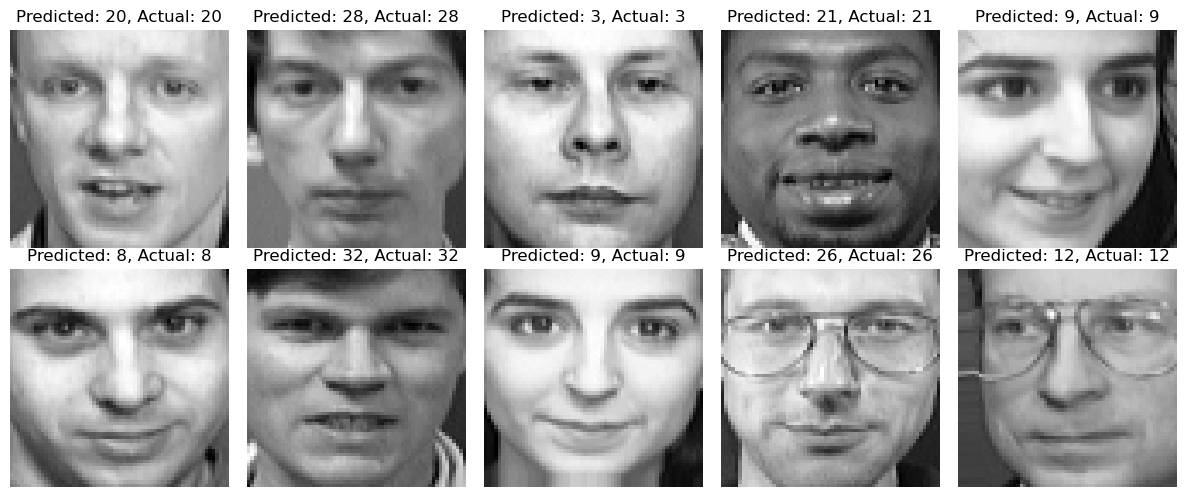

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap="gray")
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Random Forest Regressor

In [3]:
california = fetch_california_housing()

In [4]:
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [5]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5053399773665033

In [6]:
n_est = [10, 50, 100, 150, 200, 250, 300]
model_scores = []

for n in n_est:
    reg = RandomForestRegressor(n_estimators=n, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_scores.append(rmse)

print(f"Best rmse: {min(model_scores):.2f}")
print(f"Best n_estimators: {n_est[model_scores.index(min(model_scores))]}")

Best rmse: 0.50
Best n_estimators: 250
